In [86]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras import models
from keras import layers
from keras.utils import to_categorical

In [87]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [124]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Label at specified random Number :  0


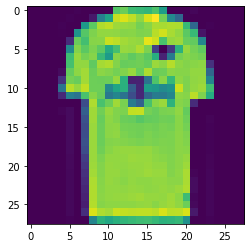

In [125]:
### Display a random image
random_no = np.random.randint(low=0, high=len(x_train))
plt.imshow((x_train[random_no]))
print("Label at specified random Number : ",y_train[random_no])

In [90]:
## type of input features
type(x_train[random_no])

numpy.ndarray

In [126]:
## shape of train and test set
print("Shape of Training data : ",x_train.shape)
print("Shape of Training label : ",y_train.shape)

print("Shape of Test data : ",x_test.shape)
print("Shape of Test label : ",y_test.shape)

Shape of Training data :  (60000, 28, 28)
Shape of Training label :  (60000,)
Shape of Test data :  (10000, 28, 28)
Shape of Test label :  (10000,)


#### As such we have 60,000 images in Training data and 10,000 images in Test data, where each images has 28*28 matrix which represent that images are black and white.

In [127]:
## Normalizing the data set
x_train, x_test = x_train / 255.0, x_test / 255.0

In [121]:
### Vectorization of each image
x_train_reshape = x_train.reshape(-1, 784)   # Each image converted in 784 (28*28) features
x_test_reshape = x_test.reshape(-1, 784)

In [134]:
# y_train = pd.get_dummies(y_train)
# y_test = pd.get_dummies(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

## Dense Network 

In [11]:
model = models.Sequential()

In [12]:
model.add(layers.Dense(units=128, activation='relu', input_dim= x_train.shape[1]))
model.add(layers.Dense(units=10, activation='softmax',))

In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model_info = model.fit(x=x_train_reshape, y=y_train, epochs=10, batch_size=128,)

Epoch 1/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.1305 - accuracy: 0.9515
Epoch 2/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.1277 - accuracy: 0.9527
Epoch 3/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.1258 - accuracy: 0.95340s - loss: 0.1
Epoch 4/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1225 - accuracy: 0.9546
Epoch 5/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.1218 - accuracy: 0.9544
Epoch 6/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.1188 - accuracy: 0.9563
Epoch 7/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.1165 - accuracy: 0.95722s - loss: 0.1158 - accura - ETA: 2s - loss: 0.1149 - accuracy - ETA - ETA
Epoch 8/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.1137 - accuracy: 0.9582
Epoch 9/10
60000/60000 [==============================] - 12s 20

In [27]:
history = model_info.history

In [28]:
history.keys()

dict_keys(['loss', 'accuracy'])

In [30]:
loss = history['loss']
accuracy = history['accuracy']

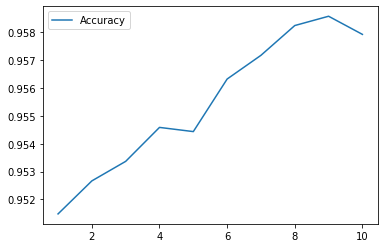

In [34]:
plt.plot(range(1,11), accuracy, label='Accuracy')
plt.legend()

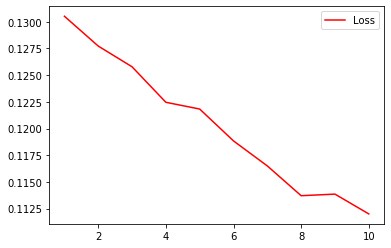

In [35]:
plt.plot(range(1,11), loss, 'r', label='Loss')
plt.legend()

## CNN Model

In [103]:
model_cnn = models.Sequential()

In [104]:
model_cnn.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model_cnn.add(layers.MaxPool2D(pool_size=(2,2)))

model_cnn.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model_cnn.add(layers.MaxPool2D(pool_size=(2,2)))


model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(units=128, activation='relu'))
model_cnn.add(layers.Dense(units=10, activation='softmax'))

In [105]:
model_cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [107]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_val_test, y_train_, y_val_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)
X_train.shape, X_val_test.shape, y_train_.shape, y_val_test.shape

((40200, 28, 28), (19800, 28, 28), (40200, 10), (19800, 10))

In [136]:
x_train_reshape_cnn = X_train.reshape((-1,28,28,1))
x_test_reshape_cnn = X_val_test.reshape((-1,28,28,1))



model_cnn_history = model_cnn.fit(x=x_train_reshape_cnn, y=y_train_, batch_size=128, epochs=10, validation_data=(x_test_reshape_cnn, y_val_test))

Train on 40200 samples, validate on 19800 samples
Epoch 1/10
40200/40200 [==============================] - 209s 5ms/step - loss: 0.3986 - accuracy: 0.8566 - val_loss: 0.5007 - val_accuracy: 0.8120
Epoch 2/10
40200/40200 [==============================] - 205s 5ms/step - loss: 0.3425 - accuracy: 0.8761 - val_loss: 0.4209 - val_accuracy: 0.8464
Epoch 3/10
40200/40200 [==============================] - 202s 5ms/step - loss: 0.3073 - accuracy: 0.8873 - val_loss: 0.3845 - val_accuracy: 0.8572
Epoch 4/10
40200/40200 [==============================] - 202s 5ms/step - loss: 0.2829 - accuracy: 0.8961 - val_loss: 0.3586 - val_accuracy: 0.8747
Epoch 5/10
40200/40200 [==============================] - 202s 5ms/step - loss: 0.2606 - accuracy: 0.9043 - val_loss: 0.3615 - val_accuracy: 0.8712
Epoch 6/10
40200/40200 [==============================] - 200s 5ms/step - loss: 0.2453 - accuracy: 0.9105 - val_loss: 0.3480 - val_accuracy: 0.8718
Epoch 7/10
40200/40200 [==============================] - 201s

In [138]:
history = model_cnn_history.history

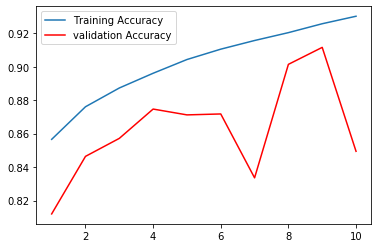

In [139]:
plt.plot(range(1,11), history['accuracy'], label='Training Accuracy')
plt.plot(range(1,11), history['val_accuracy'], 'r', label='validation Accuracy')

plt.legend()

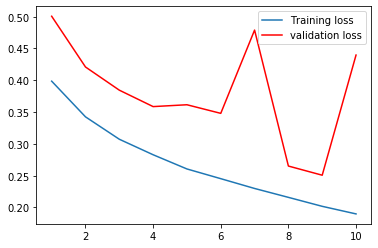

In [140]:
plt.plot(range(1,11), history['loss'], label='Training loss')
plt.plot(range(1,11), history['val_loss'], 'r', label='validation loss')

plt.legend()

In [145]:
x_test_reshae = x_test.reshape((-1,28,28,1))
print(x_test_reshae.shape, y_test.shape)

model_cnn.evaluate(x_test_reshae, y_test)

(10000, 28, 28, 1) (10000, 10)
10000/10000 [==============================] - 20s 2ms/step


[0.47681361515522, 0.8364999890327454]

## Regularization

In [149]:
from keras import regularizers

In [165]:
model_cnn = models.Sequential()

model_cnn.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1),))
model_cnn.add(layers.MaxPool2D(pool_size=(2,2), ))

model_cnn.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model_cnn.add(layers.MaxPool2D(pool_size=(2,2)))


model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(l=0.001)))
model_cnn.add(layers.Dropout(rate=0.2))
model_cnn.add(layers.Dense(units=10, activation='softmax'))

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [166]:
X_train, X_val_test, y_train_, y_val_test = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
X_train.shape, X_val_test.shape, y_train_.shape, y_val_test.shape

((54000, 28, 28), (6000, 28, 28), (54000, 10), (6000, 10))

In [167]:
x_train_reshape_cnn = X_train.reshape((-1,28,28,1))
x_val_reshape_cnn = X_val_test.reshape((-1,28,28,1))



model_cnn_history = model_cnn.fit(x=x_train_reshape_cnn, y=y_train_, batch_size=128, epochs=20, 
                                  validation_data=(x_val_reshape_cnn, y_val_test), )

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 299s 6ms/step - loss: 0.7273 - accuracy: 0.7871 - val_loss: 0.5020 - val_accuracy: 0.8510
Epoch 2/20
54000/54000 [==============================] - 289s 5ms/step - loss: 0.4735 - accuracy: 0.8588 - val_loss: 0.4086 - val_accuracy: 0.8777
Epoch 3/20
54000/54000 [==============================] - 287s 5ms/step - loss: 0.4153 - accuracy: 0.8742 - val_loss: 0.3661 - val_accuracy: 0.8880
Epoch 4/20
54000/54000 [==============================] - 287s 5ms/step - loss: 0.3792 - accuracy: 0.8845 - val_loss: 0.3663 - val_accuracy: 0.8805
Epoch 5/20
54000/54000 [==============================] - 291s 5ms/step - loss: 0.3574 - accuracy: 0.8912 - val_loss: 0.3540 - val_accuracy: 0.8915
Epoch 6/20
54000/54000 [==============================] - 290s 5ms/step - loss: 0.3431 - accuracy: 0.8950 - val_loss: 0.3429 - val_accuracy: 0.8930
Epoch 7/20
54000/54000 [==============================] - 289s 

In [ ]:
model_cnn.save("MNIST_FASHION_MOdel.h5")

In [170]:
history = model_cnn_history.history

In [1]:
plt.plot(range(1,21), history['accuracy'], label='Training Accuracy')
plt.plot(range(1,21), history['val_accuracy'], 'g', label='validation Accuracy')

plt.legend()

NameError: name 'plt' is not defined

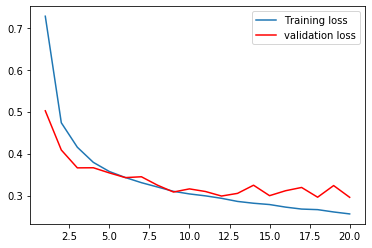

In [173]:
plt.plot(range(1,21), history['loss'], label='Training loss')
plt.plot(range(1,21), history['val_loss'], 'r', label='validation loss')

plt.legend()

In [174]:
x_test_reshae = x_test.reshape((-1,28,28,1))
print(x_test_reshae.shape, y_test.shape)

model_cnn.evaluate(x_test_reshae, y_test)

(10000, 28, 28, 1) (10000, 10)
10000/10000 [==============================] - 25s 2ms/step


[0.30722174973487854, 0.9121000170707703]